In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

In [2]:
sympy.init_printing()

# Ordinary Differentia Equations

The simplest form of an ODE is:

$$
\frac{d y(x)}{d x}=f(x, y(x))
$$

where $y(x)$ is the unknown function and $f(x, y(x))$ is known. It is a 
differential equation because the derivative of a function occurs in the 
equation, and it is only the first order derivative, thus first-order ODE.

The general form of a $n^{th}$ order ODE is:

$$
\frac{d^{n} y}{d x^{n}}=f\left(x, y, \frac{d y}{d x}, \ldots, \frac{d^{n-1} y}{d x^{n-1}}\right)
$$
 where $f$ is a known function.


## Newton's cooling law


The first example is the Newton's cooling law:

$$ \frac{dT(t)}{dt} = -k(T(t) - T_a)$$

with the initial value $T(0) = T_0$

In [3]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")

In [4]:
# representing the unknown function T(t)
T = sympy.Function("T")

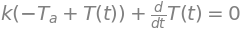

In [6]:
# using expression
ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode, 0) # expression = 0

In [7]:
# general solution using dsolve
ode_sol = sympy.dsolve(ode)
ode_sol

In [8]:
ode_sol.lhs

In [9]:
ode_sol.rhs

In [10]:
# define initial conditions
ics = {T(0): T0}
ics

In [11]:
C_eq = ode_sol.subs(t,0).subs(ics)
C_eq

In [12]:
# solving for C1
C_sol = sympy.solve(C_eq)
C_sol


In [13]:
ode_sol.subs(C_sol[0])

In [18]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on the form
    ics = {y(0): y0,, y(x).diff(x).subs(x,0): yp0, ...}, to the solution of the
    ODE with independent variable x.
    The undertermined integration constants C1, C2, ... are extracted from the 
    free symbols of the ODE solution, excluding symbols in the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)

    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics) for n in range(len(ics))]

    sol_params = sympy.solve(eqs, free_params)

    return sol.subs(sol_params)


In [19]:
ode_sol

In [20]:
apply_ics(ode_sol, ics, t, [k, Ta])

## Damped harmonic oscillator

This is a second-order ODE of the form

$$
\frac{d^{2} x(t)}{d t^{2}}+2 \gamma \omega_{0} \frac{d x(t)}{d t}+\omega_{0}^{2} x(t)=0
$$

where $x(t)$ is the position of the oscillator at time $t$, $\omega_0$ is the 
frequency for the undamped case and $\gamma$ is the damping ratio.

In [21]:
t, omega0, gamma = sympy.symbols("t, omega_0, gamma", positive=True)

In [22]:
x = sympy.Function("x")

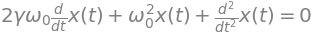

In [24]:
ode = x(t).diff(t,2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2*x(t)
sympy.Eq(ode, 0)

In [25]:
ode_sol = sympy.dsolve(ode)

In [26]:
ode_sol

In [27]:
ics = {x(0): 1, x(t).diff(t).subs(t,0): 0}
ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 1, ⎜──(x(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

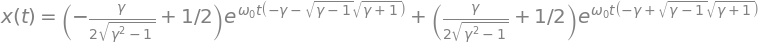

In [28]:
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

In [29]:
# when gamma goes to 1
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

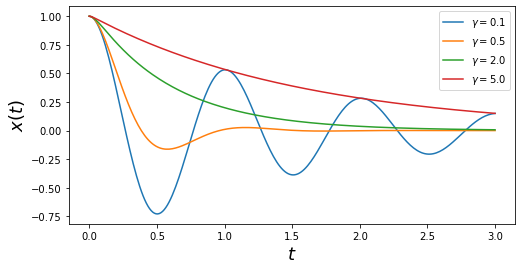

In [36]:
# plot the solution for omega0 = 2pi
fig, ax = plt.subplots(figsize=(8,4))
tt = np.linspace(0,3,250)
w0 = 2 * np.pi
for g in [0.1, 0.5, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(x, x_t_critical.subs({omega0: w0}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$ \gamma = %.1f$" % g)
    ax.set_xlabel(r"$t$", fontsize=18)
    ax.set_ylabel(r"$x(t)$", fontsize=18)
    ax.legend()



## No analytical solution

Here is an example of an ODE with no closed-form solution:

$$
\frac{d y(x)}{d x}=x+y(x)^{2}
$$

In [37]:
x = sympy.symbols("x")

In [38]:
y = sympy.Function("y")

In [39]:
f = y(x)**2 + x

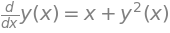

In [40]:
sympy.Eq(y(x).diff(x), f)

In [41]:
sympy.dsolve(y(x).diff(x)-f)

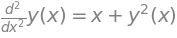

In [42]:
sympy.Eq(y(x).diff(x,x), f)

In [43]:
sympy.dsolve(y(x).diff(x,x) -f)

NotImplementedError: solve: Cannot solve -x - y(x)**2 + Derivative(y(x), (x, 2))